<a href="https://colab.research.google.com/github/Resource-Efficiency-Collective/coding-tutorials/blob/main/python_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to coding best practices in Python
This demonstration covers the key elements of coding we need to save the world via Resource Efficiency: 

1.   Clean code
2.  Loading data
3.  Visualising data

## 1 - Keep it clean!
- Comment, comment, comment - Always think about clarity: if you win the lottery and move to Barbados tomorrow, someone else (or you in 3 years time once you've spent the money) needs to pick up your work.
- Use functions - Keep code flexible by implementing functions that perform standard tasks well, this will save you A LOT of time.


An admittedly unconventional intro to coding but functions are so key to software development that let's give you a clear understanding of what they do.

In [ ]:
"""Example of a simple script"""

# Input - Variable definition
qty_apples = 4
price_apple = 0.45

# Processing - Total cost calculation
cost_total = qty_apples*price_apple

# Output - Print to screen
print(cost_total)

In [ ]:
"""Definition of function"""

def cost_calculation(qty,price):
  """This function multiplies the quantity of items
  by the unit prices and prints total cost.

  Inputs
  qty - item quantity
  price - unit price

  Outputs
  Total cost print to screen
  """
  # Calculation
  cost = qty*price
  # Output
  print(cost) 

In [ ]:
"""Use function - type cost_calculation( and follow the instructions"""
cost_calculation(qty_apples,price_apple)

Ok so that is a very basic function. Functions often (usually) do not sit within the script we are running, so let's make a more realistic set up with an external function:
1. Open the files from the left-hand bar.
2. Right-click to create a new python file called 'external_functions.py' & open it with a double-click.
3. Appropriately comment the top of this file as being used for functions related to the demo notebook.
4. Copy & Paste the definition of the cost_calculation function into the new file and rename it cost_calculation_external. Save this change by pressing Ctrl+s.
5. Run the next cell to import the external file functions to the notebook.

In [ ]:
"""Importing functions to the notebook"""
import external_functions as ext

In [ ]:
"""Now let's use the function contained in the python file to calculate cost""" 
ext.cost_calculation_external(qty_apples,price_apple)

A few more hints towards best practices:
1. Readability - Consistent style, code blocks, comments, appropriate variable names
2. Don't reinvent the wheel - Google is your friend, someone has usually done it before
3. Don't repeat yourself - Coding is meant to automate tasks, use functions, avoid hard-coding
4. Test your code as you go - Much easier to debug




## 2 - Importing Data
At Refficiency we love data. So how de we handle it? Let's do a simple exercise to see the workflow necessary for a re-usable pipeline in Python.

1. Go to https://di.unfccc.int/detailed_data_by_party and pick for example: 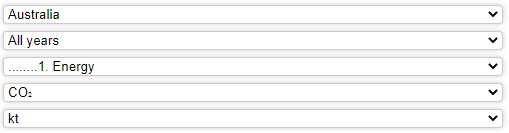
2. Export as .csv & upload to Google Colab with the upload button in the left files bar.
3. Run the cell below to import a package of functions called 'pandas' which is great for handling table style data.

In [ ]:
"""Import of pandas functions"""
import pandas as pd

To find an appropriate function within pandas for reading our .csv file, either start typing pd.read_ in the next box to see the options, or got to the pandas documentation https://pandas.pydata.org/docs/reference/io.html. You can get the path to our file by right-clicking on it in the file bar.


In [ ]:
"""Let's import the data"""
filepath = '/content/Annual greenhouse gas (GHG) emissions for Australia, in kt.csv'
data = pd.read_csv(filepath)

Didn't work? All part of the learning curve I guess... What does the error say?

Let's check what the .csv looks like, open it up from your Downloads folder.

A few additional lines in there? Check the [function docs](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv) to see if we can solve this, a hint we're looking for attributes about rows.

In [ ]:
"""Re-try the import"""
data = pd.read_csv(filepath, skiprows=3, nrows=6)

In [ ]:
"""Ok let's display the top rows"""
data.head()

Lessons?
1. Debugging - Always read the error message, as frustrating as it gets there's ALWAYS a reason it's not working.
2. Check-out your raw data file to use the most appropriate import method

# 3 - Visualising data
Ok great, we have a bunch of numbers! Now let's make them talk. 

Can we get a graph displaying the comparative contributions of each category?

Although pandas has some plotting capabilities of it's own, the basic plotting package for python is matplotlib.

In [ ]:
"""Let's get plotting"""
# Import library
import matplotlib.pyplot as plt

# Re-format data for plotting
years = data.columns[2:]
emissions = data.values[:,2:]

# Plotting
plt.plot(years,emissions[0])

Ooh that's not pretty... But at least it works.
Let's try embellishing a little.

In [ ]:
"""Let's reformat our data to handle values as numeric and to reclassify non-reported data as unknown"""
# Convert emissions data to numeric
emissions_vals = pd.to_numeric(emissions.flatten(), errors='coerce').reshape(emissions.shape).astype(float)

# Extract final year value
years_vals = years.values
years_vals[-1] = "".join(filter(str.isdigit,years_vals[-1]))

# Convert years to numeric values
years_vals = years.astype(float)

# Extract the names of the sectors
sectors = data.values[:,0]

# Now we'll create a prettier looking plot containing a line for each entry
fig, ax = plt.subplots(1,1,figsize=[12,5])
for i in range(emissions.shape[0]):
  ax.scatter(years_vals, emissions_vals[i], label=sectors[i])

# Adding some labels
ax.legend(), ax.set_title(filepath.split('.')[0].split('/')[-1], fontsize=18), ax.set_xlabel('Year', fontsize=15), ax.set_ylabel('CO2 emissions (kt)',fontsize=15)
plt.show()

# 4 - Make a function that does this for any UNFCCC data

In [ ]:
"""Let's define the function here and import the necessary functions"""
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt

def plot_unfccc(filepath, header=3, nrows=6, first_col=2, 
                figsize=[12,5], xtitle='Year', ytitle='CO2 emissions (kt)'):
  """This function plots emissions over time for each sector included in a 
  UNFCCC .csv file

  Inputs
  filepath - path to data file
  header - rows before data in .csv
  nrows - rows of data to plot
  first_col - first column with data
  figsize - size of output plot
  xtitle - Title of x axis
  ytitle - Title of y axis
  """
  # Importing
  data = pd.read_csv(filepath, skiprows=header, nrows=nrows)

  # Extract data
  years = data.columns[first_col:]
  emissions = data.values[:,first_col:]

  # Convert emissions data to numeric
  emissions_vals = pd.to_numeric(emissions.flatten(), errors='coerce').reshape(emissions.shape).astype(float)

  # Extract final year value
  years_vals = years.values
  years_vals[-1] = "".join(filter(str.isdigit,years_vals[-1]))

  # Convert years to numeric values
  years_vals = years.astype(float)

  # Extract the names of the sectors
  sectors = data.values[:,0]

  # Now we'll create a prettier looking plot containing a line for each entry
  fig, ax = plt.subplots(1,1,figsize=figsize)
  for i in range(emissions.shape[0]):
    ax.scatter(years_vals, emissions_vals[i], label=sectors[i])

  # Adding some labels
  ax.legend(), ax.set_title(filepath.split('.')[0].split('/')[-1], fontsize=18), ax.set_xlabel(xtitle, fontsize=15), ax.set_ylabel(ytitle,fontsize=15)
  plt.show()

In [ ]:
# Defining variables 
filepath = '/content/Annual greenhouse gas (GHG) emissions for Australia, in kt.csv'

# Call function
plot_unfccc(filepath)

Nice plot! If you've got this far, let's try 2 more things:
1. Add this function to the external_functions.py file you made earlier. In the next box create the graph from this external function.

In [ ]:
# Reload the external functions 
from importlib import reload
reload(ext)

In [ ]:
# Use the external function to produce the graph
ext.plot_unfccc(filepath)

2. Head back to https://di.unfccc.int/detailed_data_by_party and use this function with a different country.

In [ ]:
filepath = '/content/Annual greenhouse gas (GHG) emissions for Austria, in kt.csv'
ext.plot_unfccc(filepath)

You've made it to the end! Hope that helps and if you've whizzed through this without any issues (looking at you José), either go play on [Edabit](https://edabit.com/challenges/python3) or discuss best practices with colleagues!



Content created for the Refficiency group away weekend in 2021. Contact lshc3@cam.ac.uk for any queries. 